<h1><center> 1. Projet-7 Nettoyage & Analyse Exploratoire</center></h1>

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dico_pd_option = {
    'display.max_rows': 400,
    'display.max_column': 200,
    'display.width': 300,
    'display.precision': 4,
    'display.max_colwidth': 1000,
    'mode.chained_assignment': None
}
for cle, val in dico_pd_option.items():
    pd.set_option(cle, val)

## Les fonctions

In [3]:
def get_missing_values(df_work, pourcentage, affiche_heatmap):
    # 1. Nombre de valeurs manquantes totales
    nb_nan_tot = df_work.isna().sum().sum()
    nb_donnees_tot = np.product(df_work.shape)
    pourc_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)
    print(
        f'Valeurs manquantes :{nb_nan_tot} NaN pour\
        {nb_donnees_tot} données ({pourc_nan_tot} %)')
    if pourcentage:
        print("-------------------------------------------------------------")
        print("Nombre et pourcentage de valeurs manquantes par variable\n")
        # 2. Visualisation du nombre et du pourcentage de valeurs manquantes
        # par variable
        values = df_work.isnull().sum()
        percentage = 100 * values / len(df_work)
        table = pd.concat([values, percentage.round(2)], axis=1)
        table.columns = [
            'Nombres de valeurs manquantes',
            '% de valeurs manquantes']
        display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values('% de valeurs manquantes', ascending=False)
                .style.background_gradient('seismic'))
    if affiche_heatmap:
        print("-------------------------------------------------------------")
        print("Heatmap de visualisation des valeurs manquantes")
        # 3. Heatmap de visualisation des valeurs manquantes
        plt.figure(figsize=(20, 10))
        sns.heatmap(df_work.isna(), cbar=False)
        plt.show()

In [4]:
def description_variables(dataframe, type_var='all'):
    df_taille = dataframe.shape[0]

    if type_var == 'num':
        desc_var = dataframe.describe(include=[np.number])
    elif type_var == 'cat':
        desc_var = dataframe.describe(
            include='object')
    elif type_var == 'date':
        desc_var = dataframe.describe(
            include='datetime64[ns]')
    elif type_var == 'bool':
        desc_var = dataframe.describe(
            include='bool')
    else:
        desc_var = dataframe.describe(include='all')

    desc_type = pd.DataFrame(
        dataframe[desc_var.columns].dtypes, columns=['type']).T
    nb_nan = df_taille - desc_var.loc['count'].T
    pourcentage_nan = nb_nan * 100 / df_taille
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan],
                            index=['nb_nan', '%_nan'])
    desc_var = pd.concat([desc_type, desc_nan, desc_var])

    return desc_var

In [5]:
def cleaning_categories(col):
    '''
    Fonction qui nettoie une phrase de ses caractères spéciaux.
    Et la passe en majuscule( pour un passage en nom de colonne avec one hot)
    '''
    col = str(col).replace('-', '').replace('+', '').replace('/', ' ').replace(':', '_')
    col = str(col).upper()
    return col

## Importation data

In [6]:
# List files available
print(os.listdir("data/source"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [7]:
# Training data
data = pd.read_csv('data/source/application_train.csv')
print('Training data shape: ', data.shape)
data.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2629,0.1394,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5559,0.7296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- Les données comportent 307 511 observations (chacune représentant un emprunt distinct) et 122 caractéristiques (variables),

- comportant y :  la CIBLE (l'étiquette que nous voulons prédire).

## Etude de la target
Target variable 
- **1 :** client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample : **Le client risque de ne pas rembourser**
- **0 :** all other cases : **Le client rembourse son crédit**

In [8]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [9]:
data['TARGET'].value_counts()/len(data)*100

TARGET
0    91.9271
1     8.0729
Name: count, dtype: float64

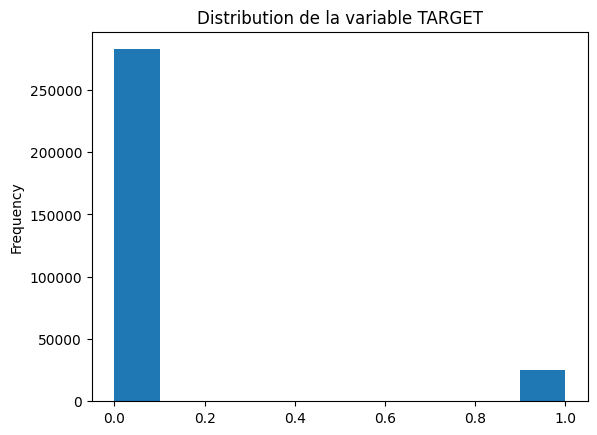

In [10]:
fig = plt.figure()
data['TARGET'].plot.hist()
plt.title('Distribution de la variable TARGET')
plt.show()

**Problème de classe déséquilibré.**

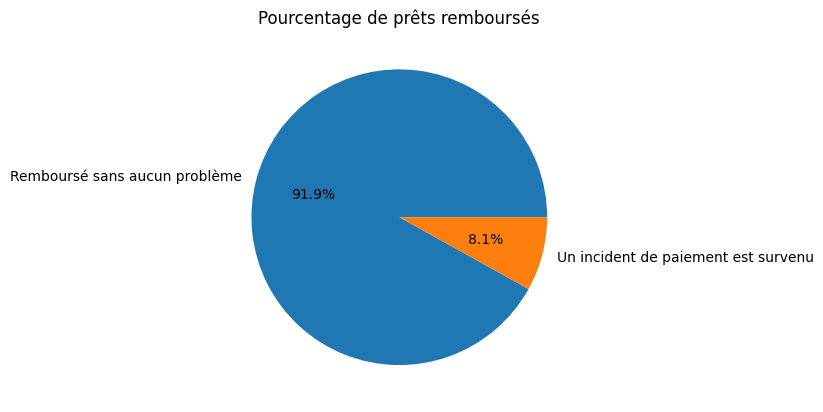

In [11]:
fig = plt.figure()
plt.pie(data['TARGET'].value_counts()/len(data)*100,
        autopct='%1.1f%%',
        labels=["Remboursé sans aucun problème", "Un incident de paiement est survenu"]
       )
plt.title('Pourcentage de prêts remboursés')
plt.show()

- À partir de ces informations, nous voyons qu'il s'agit d'un problème de classe déséquilibré. 
    - Il y a beaucoup plus de prêts qui ont été remboursés à temps que de prêts qui n'ont pas été remboursés. 
    
- Dans des modèles d'apprentissage automatique plus sophistiqués, nous pourrons pondérer les classes en fonction de leur représentation dans les données pour refléter ce déséquilibre.
- **Une methode tel que SMOTE, Class Weight, undersampling devra être utilisée afin de pas biaiser les résultats de l'algorithme de scoring.**

## Analyse des valeurs manquantes

Valeurs manquantes :9152465 NaN pour        37516342 données (24.4 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
COMMONAREA_MEDI,214865,69.870000
COMMONAREA_AVG,214865,69.870000
COMMONAREA_MODE,214865,69.870000
NONLIVINGAPARTMENTS_MEDI,213514,69.430000
NONLIVINGAPARTMENTS_MODE,213514,69.430000
NONLIVINGAPARTMENTS_AVG,213514,69.430000
FONDKAPREMONT_MODE,210295,68.390000
LIVINGAPARTMENTS_MODE,210199,68.350000
LIVINGAPARTMENTS_MEDI,210199,68.350000
LIVINGAPARTMENTS_AVG,210199,68.350000


-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


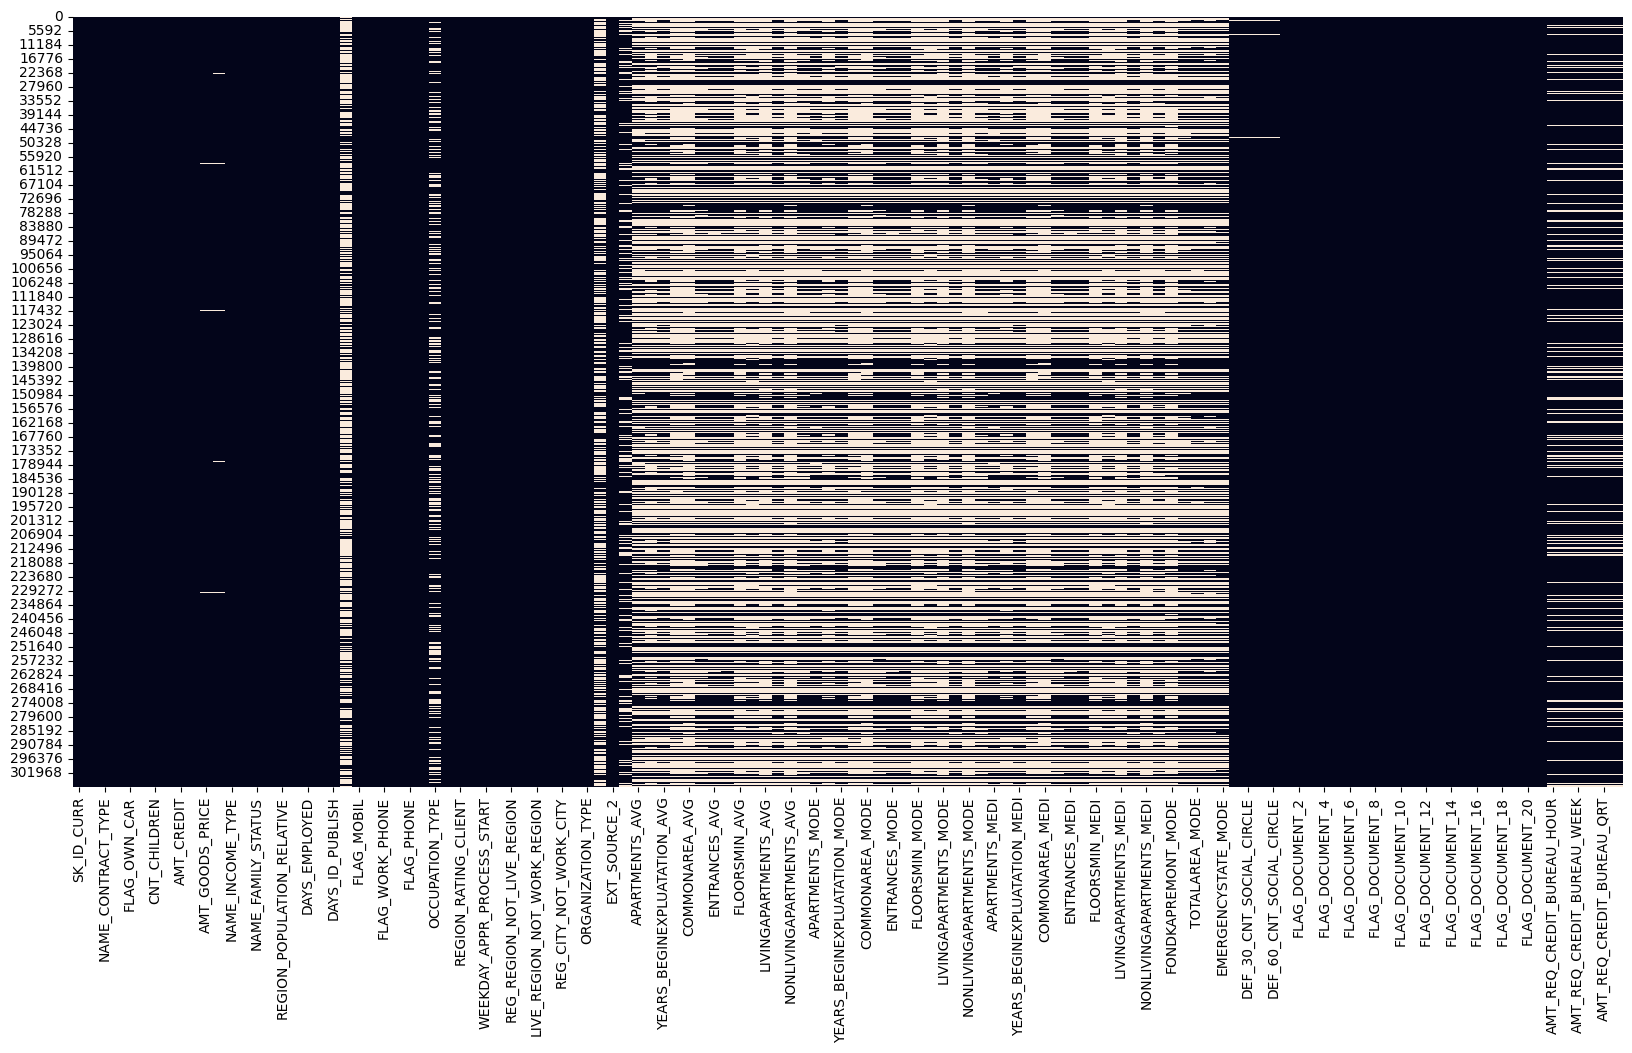

In [12]:
get_missing_values(data, True, True)

- Lorsque viendra le temps de construire nos modèles d'apprentissage automatique, nous devrons remplir ces valeurs manquantes (appelées imputation). 
- Dans des travaux ultérieurs, nous utiliserons des modèles tels que XGBoost qui peuvent gérer les valeurs manquantes sans nécessiter d'imputation. 
- Une autre option serait de supprimer les colonnes avec un pourcentage élevé de valeurs manquantes, bien qu'il soit impossible de savoir à l'avance si ces colonnes seront utiles à notre modèle. 

- **Par conséquent, nous conserverons toutes les colonnes pour le moment.**

### Les types de données

In [13]:
# Number of each type of column
data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

<Axes: title={'center': 'Répartition des types de colonnes'}, ylabel='count'>

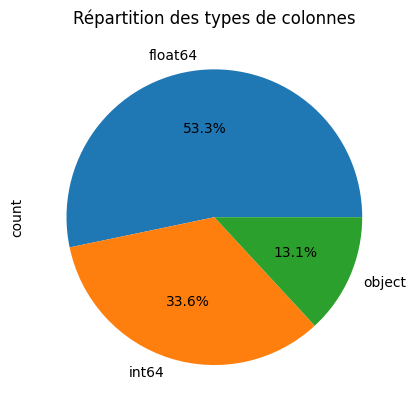

In [14]:
data.dtypes.value_counts().plot(kind='pie',autopct="%1.1f%%", title = "Répartition des types de colonnes")

### Les entrées uniques des variables catégorielles

In [15]:
# On visualise le nombre de valeurs uniques
for col in data.select_dtypes('object'):
    print(f'{col:-<50} {data[col].nunique()}')
    print(f'{col:-<50} {data[col].unique()}')
    print('-'*100)

NAME_CONTRACT_TYPE-------------------------------- 2
NAME_CONTRACT_TYPE-------------------------------- ['Cash loans' 'Revolving loans']
----------------------------------------------------------------------------------------------------
CODE_GENDER--------------------------------------- 3
CODE_GENDER--------------------------------------- ['M' 'F' 'XNA']
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR-------------------------------------- 2
FLAG_OWN_CAR-------------------------------------- ['N' 'Y']
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY----------------------------------- 2
FLAG_OWN_REALTY----------------------------------- ['Y' 'N']
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE----------------------------------- 7
NAME_TYPE_SUITE----------------------------------- ['Unacc

## Nettoyage

In [16]:
description_variables(data,'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
type,int64,int64,object,object,object,object,int64,float64,float64,float64,float64,object,object,object,object,object,float64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,object,float64,int64,int64,object,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object,object,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
nb_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,278.0,1292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202929.0,0.0,0.0,0.0,0.0,0.0,0.0,96391.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173378.0,660.0,60965.0,156061.0,179943.0,150007.0,204488.0,214865.0,163891.0,154828.0,153020.0,208642.0,182590.0,210199.0,154350.0,213514.0,169682.0,156061.0,179943.0,150007.0,204488.0,214865.0,163891.0,154828.0,153020.0,208642.0,182590.0,210199.0,154350.0,213514.0,169682.0,156061.0,179943.0,150007.0,204488.0,214865.0,163891.0,154828.0,153020.0,208642.0,182590.0,210199.0,154350.0,213514.0,169682.0,210295.0,154297.0,148431.0,156341.0,145755.0,1021.0,1021.0,1021.0,1021.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41519.0,41519.0,41519.0,41519.0,41519.0,41519.0
%_nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0039,0.0904,0.4201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.9908,0.0,0.0,0.0,0.0,

**NAME_CONTRACT_TYPE**

In [17]:
# NAME_CONTRACT_TYPE
data.NAME_CONTRACT_TYPE.value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

**CODE_GENDER**

In [18]:
data.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [19]:
# Suppression des 4 lignes contenant un genre == XNA
data = data[data.CODE_GENDER != 'XNA']
data.CODE_GENDER.value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

**NAME_INCOME_TYPE**

In [20]:
data['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [21]:
data[data['NAME_INCOME_TYPE']=='Maternity leave']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48949,156685,0,Revolving loans,M,N,N,0,360000.0,765000.0,76500.0,765000.0,Unaccompanied,Maternity leave,Higher education,Married,House / apartment,0.0462,-22166,-3762,-9228.0,-4363,NaN,1,1,0,1,1,0,NaN,2.0,1,1,THURSDAY,19,0,1,1,0,0,0,Business Entity Type 1,0.8990,0.7223,NaN,0.1938,0.0912,0.9871,0.8232,NaN,0.32,0.1379,0.5417,NaN,0.0999,NaN,0.2135,NaN,0.0052,0.1975,0.0946,0.9871,0.8301,NaN,0.3222,0.1379,0.5417,NaN,0.1022,NaN,0.2225,NaN,0.0055,0.1957,0.0912,0.9871,0.8256,NaN,0.32,0.1379,0.5417,NaN,0.1017,NaN,0.2174,NaN,0.0053,reg oper account,block of flats,0.1690,Panel,No,0.0,0.0,0.0,0.0,-718.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
109612,227123,0,Revolving loans,F,N,Y,2,135000.0,810000.0,40500.0,810000.0,"Spouse, partner",Maternity leave,Higher education,Married,House / apartment,0.0308,-14943,-1223,-8853.0,-3868,NaN,1,1,0,1,0,0,Core staff,4.0,2,2,TUESDAY,17,0,0,0,0,0,0,Self-employed,0.7649,0.6556,NaN,0.0330,0.0000,0.9742,NaN,NaN,0.00,0.0690,0.1250,NaN,0.0000,NaN,0.0196,NaN,0.0000,0.0336,0.0000,0.9742,NaN,NaN,0.0000,0.0690,0.1250,NaN,0.0000,NaN,0.0205,NaN,0.0000,0.0333,0.0000,0.9742,NaN,NaN,0.00,0.0690,0.1250,NaN,0.0000,NaN,0.0200,NaN,0.0000,reg oper spec account,block of flats,0.0235,"Stone, brick",No,0.0,0.0,0.0,0.0,-20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
218269,352877,1,Cash loans,F,N,Y,2,67500.0,1435500.0,40896.0,1435500.0,Unaccompanied,Maternity leave,Secondary / secondary special,Married,House / apartment,0.0069,-13121,-3629,-795.0,-1007,NaN,1,1,0,1,0,0,Laborers,4.0,3,3,TUESDAY,11,0,0,0,0,0,0,Transport: type 2,NaN,0.4044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [22]:
cols_to_clean = data.select_dtypes('object').columns

In [23]:
for cols in cols_to_clean: 
    data[cols] = data[cols].apply(lambda x : cleaning_categories(x))
data[cols_to_clean]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,CASH LOANS,M,N,Y,UNACCOMPANIED,WORKING,SECONDARY SECONDARY SPECIAL,SINGLE NOT MARRIED,HOUSE APARTMENT,LABORERS,WEDNESDAY,BUSINESS ENTITY TYPE 3,REG OPER ACCOUNT,BLOCK OF FLATS,"STONE, BRICK",NO
1,CASH LOANS,F,N,N,FAMILY,STATE SERVANT,HIGHER EDUCATION,MARRIED,HOUSE APARTMENT,CORE STAFF,MONDAY,SCHOOL,REG OPER ACCOUNT,BLOCK OF FLATS,BLOCK,NO
2,REVOLVING LOANS,M,Y,Y,UNACCOMPANIED,WORKING,SECONDARY SECONDARY SPECIAL,SINGLE NOT MARRIED,HOUSE APARTMENT,LABORERS,MONDAY,GOVERNMENT,NAN,NAN,NAN,NAN
3,CASH LOANS,F,N,Y,UNACCOMPANIED,WORKING,SECONDARY SECONDARY SPECIAL,CIVIL MARRIAGE,HOUSE APARTMENT,LABORERS,WEDNESDAY,BUSINESS ENTITY TYPE 3,NAN,NAN,NAN,NAN
4,CASH LOANS,M,N,Y,UNACCOMPANIED,WORKING,SECONDARY SECONDARY SPECIAL,SINGLE NOT MARRIED,HOUSE APARTMENT,CORE STAFF,THURSDAY,RELIGION,NAN,NAN,NAN,NAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,CASH LOANS,M,N,N,UNACCOMPANIED,WORKING,SECONDARY SECONDARY SPECIAL,SEPARATED,WITH PARENTS,SALES STAFF,THURSDAY,SERVICES,REG OPER ACCOUNT,BLOCK OF FLATS,"STONE, BRICK",NO
307507,CASH LOANS,F,N,Y,UNACCOMPANIED,PENSIONER,SECONDARY SECONDARY SPECIAL,WIDOW,HOUSE APARTMENT,NAN,MONDAY,XNA,REG OPER ACCOUNT,BLOCK OF FLATS,"STONE, BRICK",NO
307508,CASH LOANS,F,N,Y,UNACCOMPANIED,WORKING,HIGHER EDUCATION,SEPARATED,HOUSE APARTMENT,MANAGERS,THURSDAY,SCHOOL,REG OPER ACCOUNT,BLOCK OF FLATS,PANEL,NO
307509,CASH LOANS,F,N,Y,UNACCOMPANIED,COMMERCIAL ASSOCIATE,SECONDARY SECONDARY SPECIAL,MARRIED,HOUSE APARTMENT,LABORERS,WEDNESDAY,BUSINESS ENTITY TYPE 1,NAN,BLOCK OF FLATS,"STONE, BRICK",NO


In [24]:
for col in data.select_dtypes('object'):
    print(f'{col:-<50} {data[col].nunique()}')
    print(f'{col:-<50} {data[col].unique()}')
    print('-'*100)

NAME_CONTRACT_TYPE-------------------------------- 2
NAME_CONTRACT_TYPE-------------------------------- ['CASH LOANS' 'REVOLVING LOANS']
----------------------------------------------------------------------------------------------------
CODE_GENDER--------------------------------------- 2
CODE_GENDER--------------------------------------- ['M' 'F']
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR-------------------------------------- 2
FLAG_OWN_CAR-------------------------------------- ['N' 'Y']
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY----------------------------------- 2
FLAG_OWN_REALTY----------------------------------- ['Y' 'N']
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE----------------------------------- 8
NAME_TYPE_SUITE----------------------------------- ['UNACCOMPANI

La plupart des variables catégorielles ont un nombre relativement faible d'entrées uniques. Nous devrons trouver un moyen de traiter ces variables catégorielles : 
- Label encoder
- OneHot encoder

In [25]:
data.isna().mean().sort_values(ascending=False)

COMMONAREA_AVG                  6.9872e-01
COMMONAREA_MEDI                 6.9872e-01
COMMONAREA_MODE                 6.9872e-01
NONLIVINGAPARTMENTS_MODE        6.9433e-01
NONLIVINGAPARTMENTS_AVG         6.9433e-01
NONLIVINGAPARTMENTS_MEDI        6.9433e-01
LIVINGAPARTMENTS_MODE           6.8355e-01
LIVINGAPARTMENTS_MEDI           6.8355e-01
LIVINGAPARTMENTS_AVG            6.8355e-01
FLOORSMIN_MEDI                  6.7849e-01
FLOORSMIN_MODE                  6.7849e-01
FLOORSMIN_AVG                   6.7849e-01
YEARS_BUILD_MEDI                6.6498e-01
YEARS_BUILD_MODE                6.6498e-01
YEARS_BUILD_AVG                 6.6498e-01
OWN_CAR_AGE                     6.5991e-01
LANDAREA_AVG                    5.9377e-01
LANDAREA_MEDI                   5.9377e-01
LANDAREA_MODE                   5.9377e-01
BASEMENTAREA_AVG                5.8516e-01
BASEMENTAREA_MEDI               5.8516e-01
BASEMENTAREA_MODE               5.8516e-01
EXT_SOURCE_1                    5.6381e-01
NONLIVINGAR

### Train et Test et Export

In [27]:
from sklearn.model_selection import train_test_split
app_train, app_test = train_test_split(data, test_size=0.2)
print("Données train : ",app_train.shape)
print("Données test : ", app_test.shape)

Données train :  (246005, 122)
Données test :  (61502, 122)


In [28]:
# Export
app_train.to_csv('data/cleaned/train.csv', index=False)
app_test.to_csv('data/cleaned/test.csv', index=False)

In [29]:
train = pd.read_csv('data/cleaned/train.csv')
test = pd.read_csv('data/cleaned/test.csv')
print('Training data shape: ', train.shape)
print('Training data shape: ', test.shape)

Training data shape:  (246005, 122)
Training data shape:  (61502, 122)
